In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF

df = pd.read_csv('CADASTRO_IES_2020.CSV', encoding='ISO-8859-1', sep=';',low_memory=False)

#Removendo valores nan
df.dropna(inplace=True)

NO_REGIAO_IES
Centro-Oeste     907
Nordeste        2394
Norte            753
Sudeste         2553
Sul              559
Name: DOC_EX_PRETA, dtype: int64

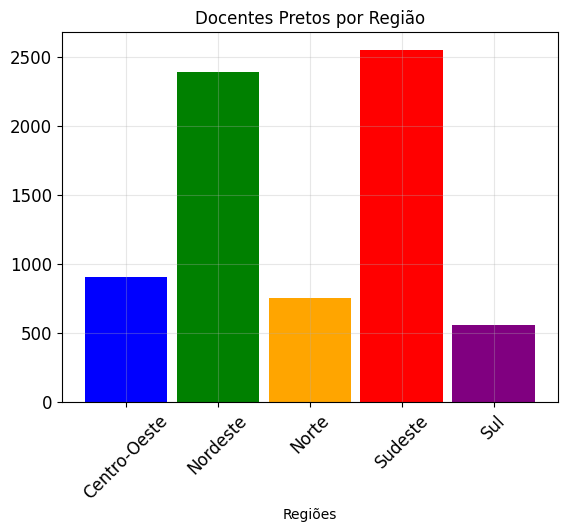

In [3]:
cores=['blue', 'green', 'orange', 'red', 'purple']
doc_pretos = df.groupby('NO_REGIAO_IES')['DOC_EX_PRETA'].sum()
doc_pretos.plot(kind='bar', title='Docentes Pretos por Região', fontsize=12.0, width=0.9, color=cores)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.xlabel('Regiões')
plt.savefig('doc_pretos.png')
doc_pretos

NO_REGIAO_IES
Centro-Oeste     41
Nordeste        137
Norte            54
Sudeste         133
Sul              52
Name: DOC_EX_INDÍGENA, dtype: int64

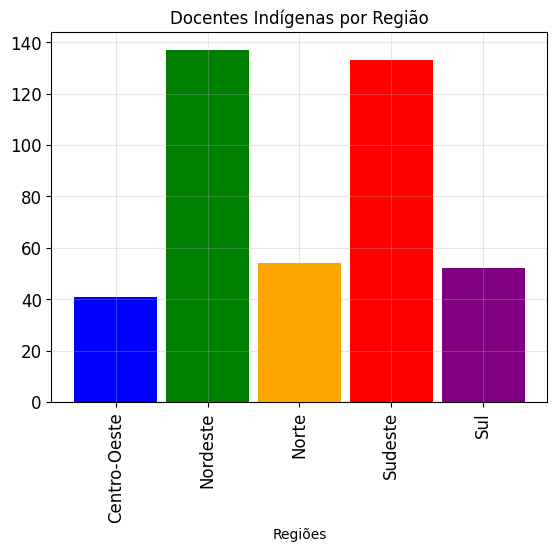

In [40]:
doc_indigenas = df.groupby('NO_REGIAO_IES')['DOC_EX_INDÍGENA'].sum()
doc_indigenas.plot(kind='bar', title='Docentes Indígenas por Região', fontsize=12.0, width=0.9, color=cores)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.xlabel('Regiões')
plt.savefig('doc_indigenas.png')

doc_indigenas

NO_REGIAO_IES
Centro-Oeste     5845
Nordeste        21916
Norte            7047
Sudeste         11348
Sul              2487
Name: DOC_EX_PARDA, dtype: int64

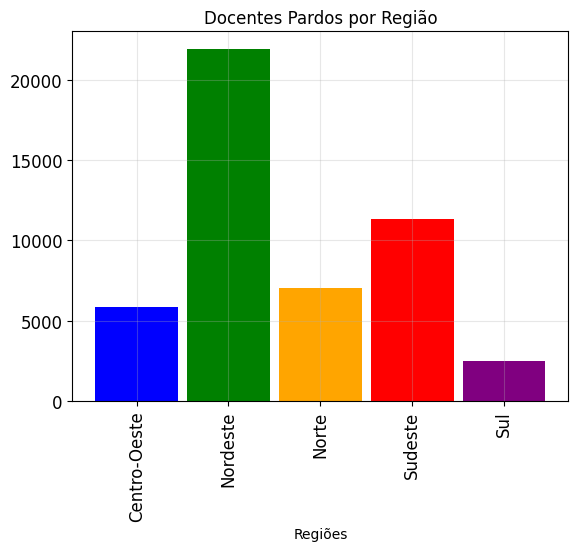

In [29]:
doc_pardos = df.groupby('NO_REGIAO_IES')['DOC_EX_PARDA'].sum()
doc_pardos.plot(kind='bar', title='Docentes Pardos por Região', fontsize=12.0, width=0.9, color=cores)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.xlabel('Regiões')
plt.savefig('doc_pardos.png')
doc_pardos

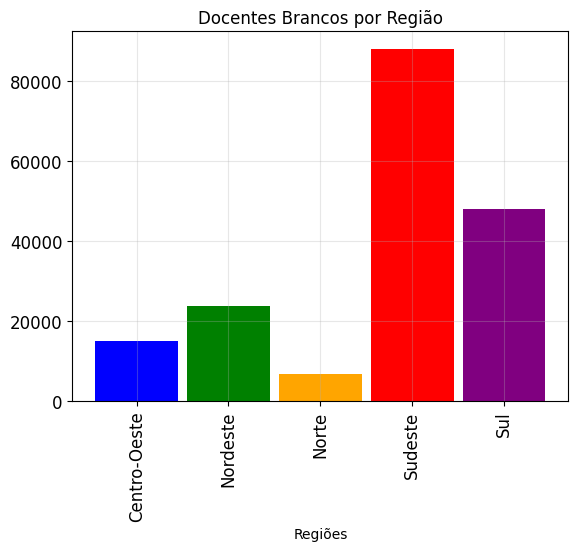

In [27]:
doc_brancos = df.groupby('NO_REGIAO_IES')['DOC_EX_BRANCA'].sum()
doc_brancos.plot(kind='bar', title='Docentes Brancos por Região', fontsize=12.0, width=0.9, color=cores)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.xlabel('Regiões')
plt.savefig('doc_brancos.png')

NO_REGIAO_IES
Centro-Oeste     34007
Nordeste         74738
Norte            23489
Sudeste         143525
Sul              66203
Name: QT_DOCENTE_TOTAL, dtype: int64

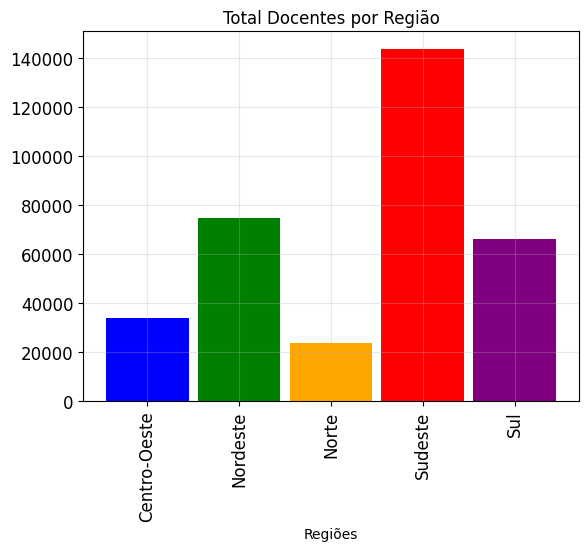

In [12]:
doc_total = df.groupby('NO_REGIAO_IES')['QT_DOCENTE_TOTAL'].sum()
doc_total.plot(kind='bar', title='Total Docentes por Região', fontsize=12.0, width=0.9, color=cores)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.xlabel('Regiões')
plt.savefig('doc_total.png')

doc_total

In [60]:
#PDF
pdf = FPDF ('P', 'mm', 'A4')

pdf.add_page()

#título
pdf.set_font('Times', 'B', 16)
pdf.set_text_color(34,139,34)
pdf.cell(200, 10, ln= True, align= 'C', txt = "Cadastro Funcionários Instituições de Ensino Superior")

pdf.set_font('Times', '', 12)
pdf.set_text_color(0,0,0)
pdf.set_y(30)
first_paragraphe = 'Em 2020 havia 2457 instituições de ensino superior no Brasil. Através do Instituto Nacional de Estudos e Pesquisas Nacionais (INEP), foi realizado um Censo mapeando as instituições de ensino superior, a seguir discustiremos dados que chamaram a atenção.'
pdf.multi_cell(w= 0, h=10, align= 'J', txt= first_paragraphe)

pdf.image(name='doc_total.png', x= 60, y = 70, w= 100)

pdf.set_y(170)
second_paragraphe = 'Existe o total de 341962 docentes contratados no Brasil, tendo destaque de maior concentração nas regiões sudeste e nordeste, onde existe maior quantidade demográfica.'
pdf.multi_cell(w= 0, h=10, align= 'J', txt= second_paragraphe)


pdf.image('doc_brancos.png', x=60, y=200, w= 100)

pdf.set_y(290)
third_paragraphe = 'A luta racial ainda é grande para promover igualdade em organizações ainda está ocorrendo, até o ano de 2020, 53% dos docentes contratados eram brancos.'
pdf.multi_cell(w= 0, h=10, align= 'J', txt= third_paragraphe)

pdf.image('doc_pretos.png', x=60, y=40, w=100)

pdf.set_y(140)
fourth_paragraphe = 'A terceira maior taxa de contratação de docentes pretos, totalizando o total de 2% de professores pretos contratados, mesmo assim segue muito abaixo do valor ideal tendo em vista a quantidade de milhares de funcionários contratados.'
pdf.multi_cell(w=0, h=10, align= 'J', txt= fourth_paragraphe)

pdf.image('doc_pardos.png', x=60, y=170, w =100)

pdf.set_y(270)
fifth_paragraphe = 'Uma das maiores taxas de contratação étnico-racial são de pessoas pardas totalizando 14% do total de contratação, mesmo assim não chega a metade da quantidade de pessoas brancas efetivadas.'
pdf.multi_cell(w=0, h=10, align= 'J', txt= fifth_paragraphe)

pdf.image('doc_indigenas.png', x=60, y=30, w=100)

pdf.set_y(140)
sixth_paragraphe = 'Um dado preocupante quanto a inclusão é em número de contratação de pessoas indígenas, tendo em vista que no ano de 2010 o IBGE registrou quase 900 mil pessoas, contra o valor de docentes contratados que foi de 417 pessoas representando menos de 1% das contratações,revelando a dificuldade dessas pessoas de acendem e terem trabalho e educação de qualidade.'
pdf.multi_cell(w=0, h=10, align= 'J', txt= sixth_paragraphe)

pdf.set_y(180)
final_paragraphe = 'Apesar de o Brasil está caminhando para alcançar uma inclusão racial, existe ainda uma certa precariedade no processo de alcançá-la, principalmente quando se trata de povos originários, isso reflete no processo histórico de segregação racial e existe uma necessidade de uma medida para garantir a possibilidade dessas pessoas poderem conseguir uma oportunidade de trabalho e integrar o quadro de docentescontratados.'
pdf.multi_cell(w=0, h=10, align= 'J', txt= final_paragraphe)



pdf.output('PDF_Python.pdf')

C:\Users\milen\AppData\Local\Temp\ipykernel_5964\1866757074.py:9: DeprecationWarning: The parameter "ln" is deprecated. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(200, 10, ln= True, align= 'C', txt = "Cadastro Funcionários Instituições de Ensino Superior")
